<ipython-input-11-c125d26675d4>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  DatosIPC.columns = ['Concepto'] + [f"{new_header[i]}" for i in range(1, len(DatosIPC.columns))]


Columnas originales: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       'Unnamed: 68'],
      dtype='object')
Columnas después del filtro: Index(['Indicator Name', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023'],
      dtype='object')

Índices y nombres de las columnas antes de eliminar:
0: Indicator Name
1: 2015
2: 2016
3: 2017
4: 2018
5: 2019
6: 2020
7: 2021
8: 2022
9: 2023


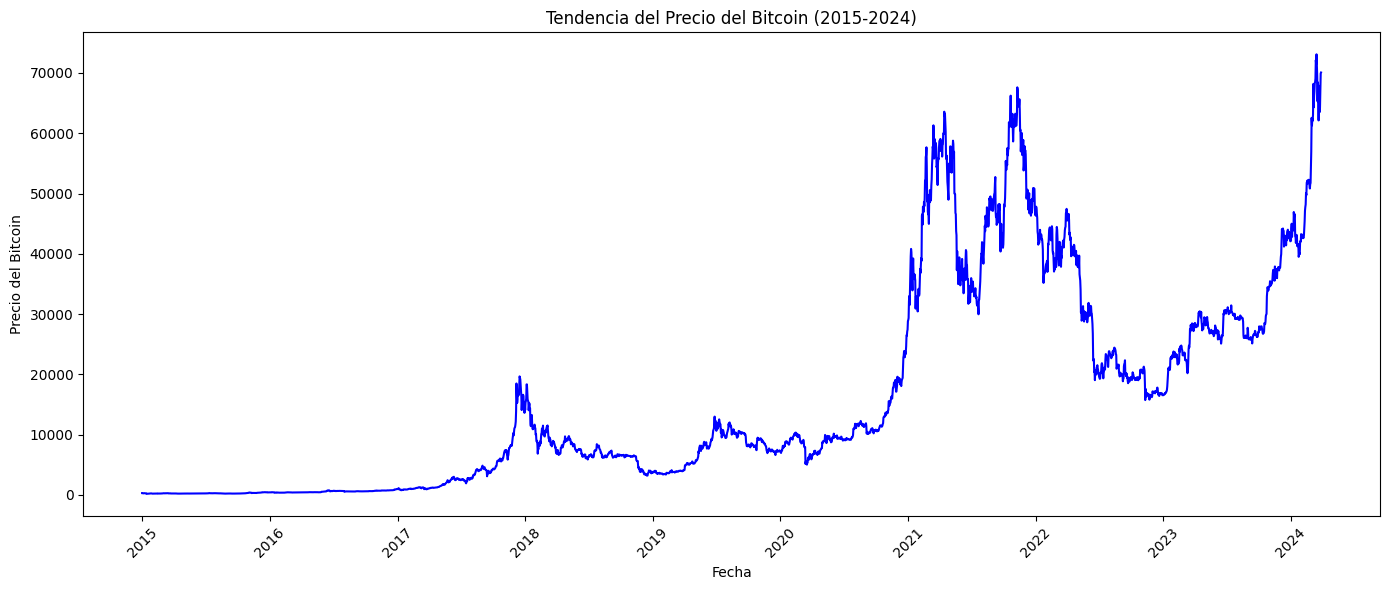

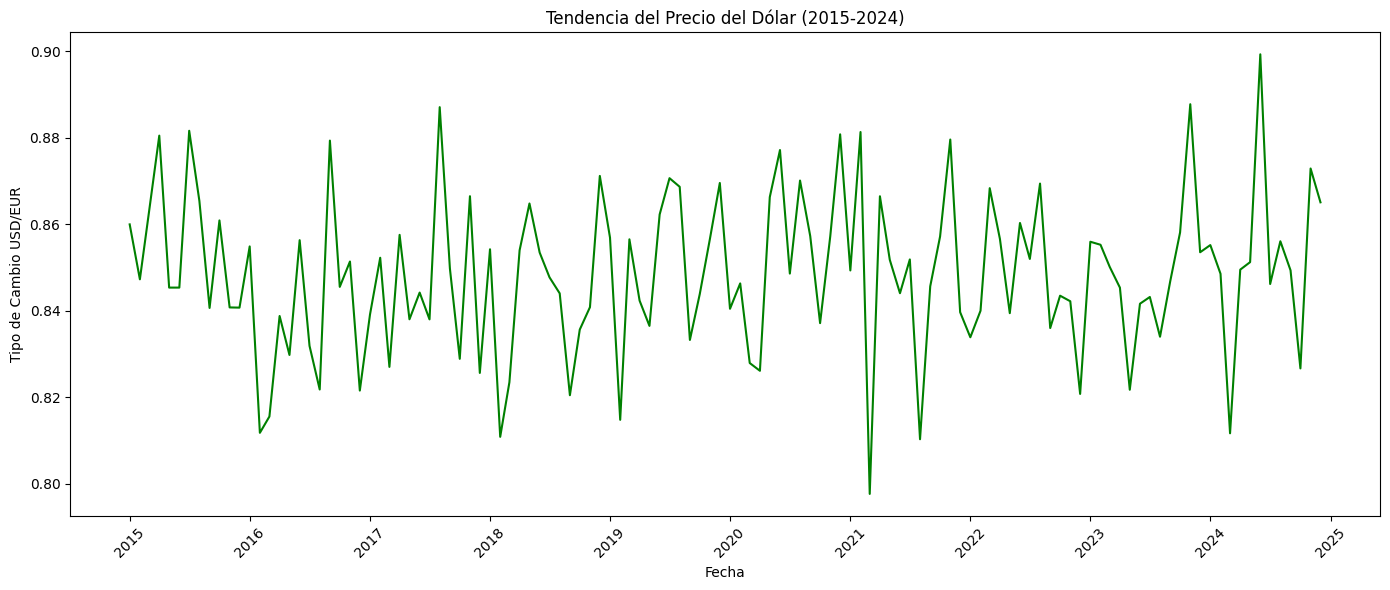

               Producto  Precio 2019  Precio 2024
0  Quintal Arroz Blanco        39.57        45.78
1   Quintal Frijol Rojo        55.15        87.19
2          Quintal Maiz        18.86        23.35
3          Huevo Unidad         0.11         0.15


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
DatosBitcoin = pd.read_csv("bitcoin.csv")
DatosValorUSD = pd.read_csv("USD-EUR-2015-2024.csv")
DatosIPC = pd.read_csv("Índice_de_Precios_al_Consumidor_(IPC).csv", skiprows=3)
DatosBancoCentral = pd.read_csv("InfoBancoCentral.csv", skiprows=4)

# Procesar DatosIPC
DatosIPC = DatosIPC.iloc[0:14]  # Seleccionar solo las filas necesarias

# Ajustar el encabezado combinando filas y limpiando los nombres
new_header = DatosIPC.iloc[0]  # Fila con los nombres de meses
DatosIPC = DatosIPC[1:]  # Eliminar la fila utilizada para el encabezado
DatosIPC.columns = ['Concepto'] + [f"{new_header[i]}" for i in range(1, len(DatosIPC.columns))]

# Limpiar los nombres de las columnas eliminando 'Unnamed' y normalizando los nombres
DatosIPC.columns = [
    col.split('_')[0] if 'Unnamed' in col else col for col in DatosIPC.columns
]

# Ajustar encabezado para incluir año en cada mes
anio_base = 2015
meses_columnas = DatosIPC.columns[1:]
columnas_actualizadas = ['Concepto']
for i, mes in enumerate(meses_columnas):
    anio = anio_base + (i // 12)  # Calcular el año correspondiente
    columnas_actualizadas.append(f"{mes}_{anio}")
DatosIPC.columns = columnas_actualizadas

# Completar valores nulos en DatosIPC
for col in DatosIPC.columns[1:]:
    if pd.api.types.is_numeric_dtype(DatosIPC[col]):
        col_mean = DatosIPC[col].mean(skipna=True)
        DatosIPC[col] = DatosIPC[col].fillna(col_mean)

# Establecer la columna 'Concepto' como índice
DatosIPC.set_index('Concepto', inplace=True)

# Procesar DatosBancoCentral
DatosBancoCentral = DatosBancoCentral.drop(DatosBancoCentral.columns[4:59], axis=1)
DatosBancoCentral = DatosBancoCentral.iloc[4:27]

# Verificar las columnas originales antes de filtrar
print("Columnas originales:", DatosBancoCentral.columns)

# Mantener 'Indicator Name' y las columnas de datos numéricos (años)
DatosBancoCentral = DatosBancoCentral.loc[:,
    (DatosBancoCentral.columns.str.contains('exportaciones|importaciones|turismo', case=False, na=False)) |
    (DatosBancoCentral.columns == 'Indicator Name') |  # Incluir 'Indicator Name'
    (DatosBancoCentral.columns.str.match(r'^\d{4}$'))  # Incluir columnas con años (e.g., 2015, 2016)
]

# Verificar las columnas después del filtro
print("Columnas después del filtro:", DatosBancoCentral.columns)

# Filtrar exportaciones, importaciones y turismo por filas
exportaciones = DatosBancoCentral[DatosBancoCentral['Indicator Name'].str.contains("Exportaciones", case=False, na=False)].copy()
importaciones = DatosBancoCentral[DatosBancoCentral['Indicator Name'].str.contains("Importaciones", case=False, na=False)].copy()
turismo = DatosBancoCentral[DatosBancoCentral['Indicator Name'].str.contains("Turismo", case=False, na=False)].copy()

# Verificar las columnas existentes y sus índices después de filtrar
print("\nÍndices y nombres de las columnas antes de eliminar:")
for idx, col in enumerate(DatosBancoCentral.columns):
    print(f"{idx}: {col}")

# Convertir formatos de fecha
DatosBitcoin['date'] = pd.to_datetime(DatosBitcoin['date'])
DatosValorUSD['Month_Year'] = pd.to_datetime(DatosValorUSD['Month_Year'], format='%m-%Y')

# Graficar tendencias del precio del Bitcoin
plt.figure(figsize=(14, 6))
sns.lineplot(data=DatosBitcoin, x='date', y='price', color='blue')
plt.title('Tendencia del Precio del Bitcoin (2015-2024)')
plt.xlabel('Fecha')
plt.ylabel('Precio del Bitcoin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graficar tendencias del tipo de cambio USD/EUR
plt.figure(figsize=(14, 6))
sns.lineplot(data=DatosValorUSD, x='Month_Year', y='USD_EUR_Exchange_Rate', color='green')
plt.title('Tendencia del Precio del Dólar (2015-2024)')
plt.xlabel('Fecha')
plt.ylabel('Tipo de Cambio USD/EUR')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrar estructura de DatosBancoCentral procesado
DatosBancoCentral

data = {
    "Producto": ["Quintal Arroz Blanco", "Quintal Frijol Rojo", "Quintal Maiz", "Huevo Unidad"],
    "Precio 2019": [39.57, 55.15, 18.86, 0.11],
    "Precio 2024": [45.78, 87.19, 23.35, 0.15]
}

df = pd.DataFrame(data)
print(df)



**GRAFICOS AGREGADOS**
1.   Relacion entre esportaciones e importaciones
2.   Tendencia del turismo
3.   Tendencias anuales del IPC



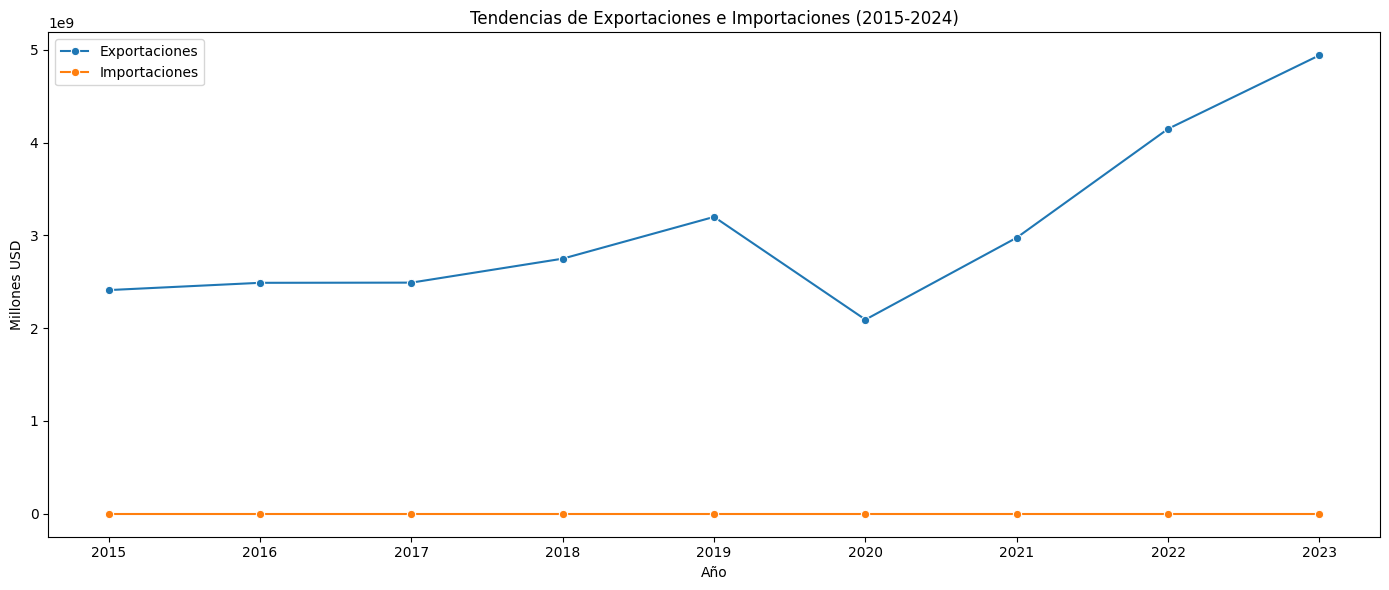

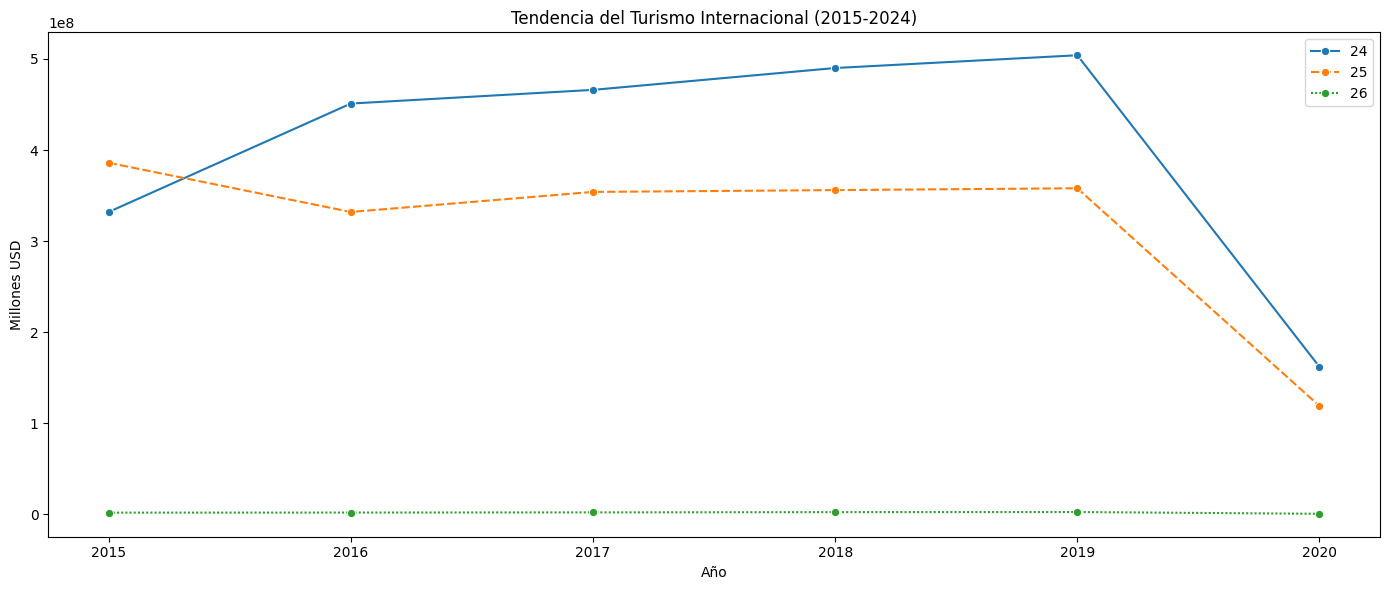

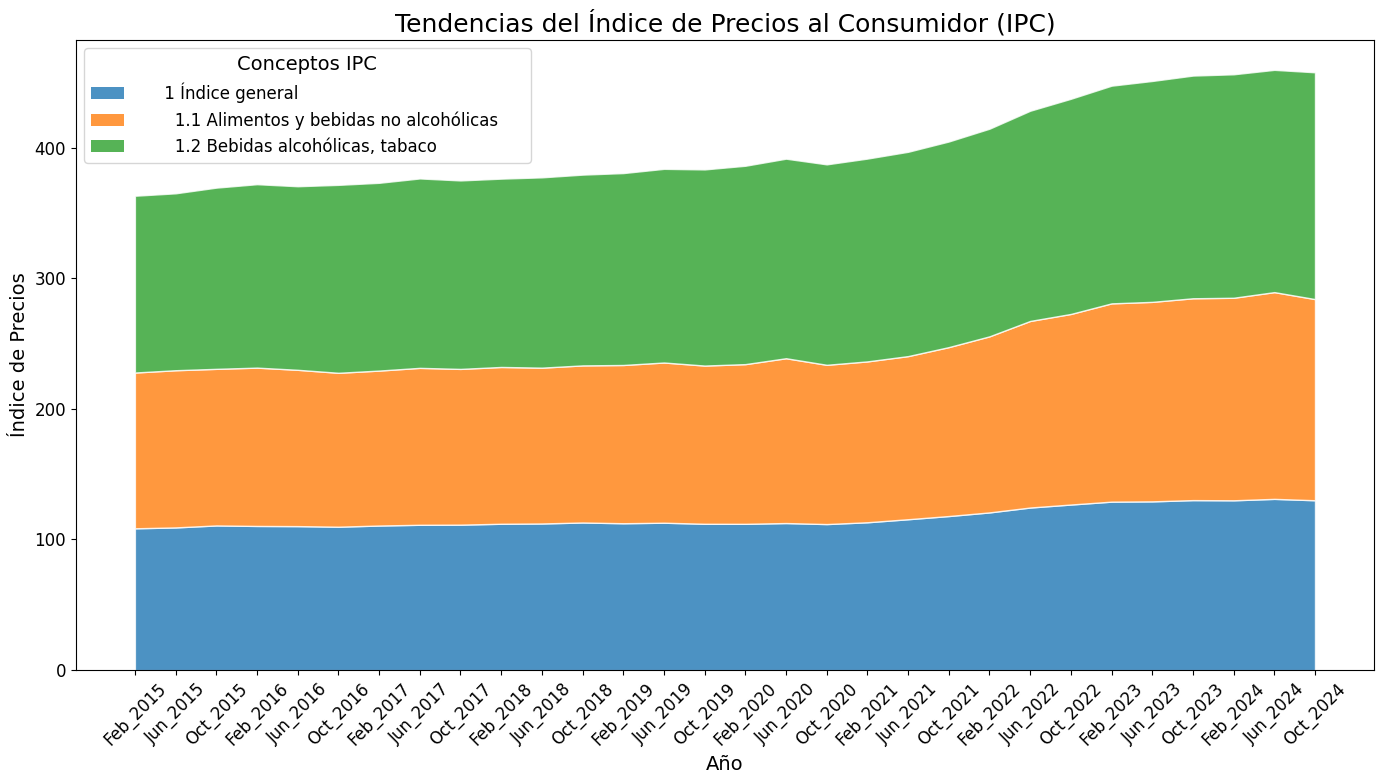

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your existing code) ...

# Graficar 3: Relación entre exportaciones e importaciones
plt.figure(figsize=(14, 6))

# Reset the index of the transposed DataFrames and rename the index column
exportaciones_reset = exportaciones.T[1:].reset_index().rename(columns={'index': 'Año'})
importaciones_reset = importaciones.T[1:].reset_index().rename(columns={'index': 'Año'})

# Use the 'Año' column for the x-axis and specify the y column explicitly
sns.lineplot(data=exportaciones_reset, x='Año', y=exportaciones_reset.columns[1], label='Exportaciones', marker='o')
sns.lineplot(data=importaciones_reset, x='Año', y=importaciones_reset.columns[1], label='Importaciones', marker='o')

plt.title('Tendencias de Exportaciones e Importaciones (2015-2024)')
plt.xlabel('Año')
plt.ylabel('Millones USD')
plt.legend()
plt.tight_layout()
plt.show()

# Graficar 4: Tendencia de turismo
plt.figure(figsize=(14, 6))
sns.lineplot(data=turismo.T[1:], marker='o', color='purple')
plt.title('Tendencia del Turismo Internacional (2015-2024)')
plt.xlabel('Año')
plt.ylabel('Millones USD')
plt.tight_layout()
plt.show()

# Graficar 5: Tendencias anuales del IPC (Índice de Precios al Consumidor)
# Filtrar años cada 4
filtered_years = ipc_transpuesto.index[::4]  # Tomar cada 4 años
ipc_filtered = ipc_transpuesto.loc[filtered_years, ipc_transpuesto.columns[:3]]  # Seleccionar solo los primeros 3 conceptos

# Crear el gráfico de áreas apiladas con los datos filtrados
plt.figure(figsize=(14, 8))  # Ajustar el tamaño del gráfico

# Crear un gráfico de áreas apiladas
plt.stackplot(
    ipc_filtered.index,
    [ipc_filtered[concepto] for concepto in ipc_filtered.columns],
    labels=ipc_filtered.columns,
    alpha=0.8  # Transparencia para mejorar la visibilidad
)

# Ajustar el título, etiquetas y detalles
plt.title('Tendencias del Índice de Precios al Consumidor (IPC)', fontsize=18)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Índice de Precios', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotar etiquetas de los años
plt.yticks(fontsize=12)
plt.legend(title='Conceptos IPC', fontsize=12, title_fontsize=14, loc='upper left')

# Mejorar la visualización con un estilo limpio
sns.set(style="whitegrid")
plt.tight_layout()
plt.show()